In [1]:
import pandas as pd
import numpy as np

#Revising our model
Due to our model performance lacking, we decided to revise a few things that related to making our model. This notebook will outline every step we revised.


##Revisting our Preprocessing step

Upon reflection, it's entirely possible our model was training on too little data. 547 per class isn't significant and is not enough data for our model to truly train.

We'll extend it to 4000 for each class. A bit of bias is okay (as there's only one emotion that's smaller/suffers from this), what's important is that our model can actually train on significant data.

Otherwise, normalizing was sufficient. We potentially may include validation.

In [2]:
#Name of csv is fer2013.csv
df = pd.read_csv('fer2013.csv')

In [3]:
LIMIT = 4000

def isLimit(map):
    for key in map:
        if map[key] < LIMIT:
            return False
    return True

def saveData(data):
    with open('face-emo.csv', 'w') as file:
        file.writelines(data)
    print("data saved under face-emo.csv")
    return


"""
    { 0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprize", 6: "Neutral" }

    This function is used to balance the data between emotions so we have an
    even number of pixels for each categories. The new data is saved in a new
    file called face-emo.csv.

    TODO: We might need to remove the Usage Column
"""
def fetch_data():
    data = []
    classes = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}

    with open('fer2013.csv', 'r') as file:
        data.append(file.readline())

        for line in file:
            emo = int(line.split(',')[0])

            if classes[emo] != LIMIT:
                data.append(line)
                classes[emo] += 1

            if isLimit(classes) == True:
                break

        print(classes)

        # print(f"length of data should equal 547 * 7. data = {len(data) - 1} == {547 * 7}")
        # Saving new data
        saveData(data)

    return


if __name__ == "__main__":
    fetch_data()


{0: 4000, 1: 547, 2: 4000, 3: 4000, 4: 4000, 5: 4000, 6: 4000}
data saved under face-emo.csv


###Skip here if you uploaded face-emo.csv (with 4000 per class)

In [4]:
truncatedDf = pd.read_csv('face-emo.csv')
print(truncatedDf)

       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
24542        1  58 83 97 101 104 105 107 107 107 108 108 107 1...  PrivateTest
24543        5  7 5 5 4 3 0 2 6 6 6 6 6 5 5 5 3 8 15 22 32 36 ...  PrivateTest
24544        5  253 255 229 150 89 61 54 60 55 49 61 50 56 45 ...  PrivateTest
24545        5  196 196 197 197 198 198 198 196 176 148 122 10...  PrivateTest
24546        5  131 159 90 59 10 0 1 1 1 0 1 1 0 0 2 2 5 7 9 1...  PrivateTest

[24547 rows x 3 columns]


###Normalizing Step

In [5]:
#normalizing pixel data of our data frame

from sklearn.preprocessing import MinMaxScaler

#each pixel entry in the data frame is of type string, so first we must convert them into a list of arrays
#function to convert string into array of numbers
def string_to_array(numbers_string):
    number_strings = numbers_string.split()
    numbers_array = np.array([float(number) for number in number_strings])
    return numbers_array

# Apply the function to the DataFrame column
truncatedDf['pixels'] = truncatedDf['pixels'].apply(string_to_array)


#drop the unnecessary columns (label column and column with string data)
pixelnormdf = truncatedDf.drop(columns =['emotion', 'Usage'])

print(pixelnormdf)

scaler = MinMaxScaler()

#since minmax scalar only works on one value, we must iterate over the array in each row of number in the data frame
for i, row in pixelnormdf.iterrows():
    scaled_array = scaler.fit_transform(np.array(row['pixels']).reshape(-1, 1))
    pixelnormdf.loc[i, 'pixels'] = scaled_array.flatten()

print(pixelnormdf)

                                                  pixels
0      [70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63....
1      [151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111...
2      [231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161...
3      [24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20....
4      [4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
...                                                  ...
24542  [58.0, 83.0, 97.0, 101.0, 104.0, 105.0, 107.0,...
24543  [7.0, 5.0, 5.0, 4.0, 3.0, 0.0, 2.0, 6.0, 6.0, ...
24544  [253.0, 255.0, 229.0, 150.0, 89.0, 61.0, 54.0,...
24545  [196.0, 196.0, 197.0, 197.0, 198.0, 198.0, 198...
24546  [131.0, 159.0, 90.0, 59.0, 10.0, 0.0, 1.0, 1.0...

[24547 rows x 1 columns]
                                                  pixels
0      [0.2964824120603015, 0.34673366834170855, 0.35...
1      [0.6894977168949772, 0.684931506849315, 0.6712...
2      [0.9058823529411765, 0.8313725490196078, 0.611...
3      [0.053811659192825115, 0.08968609865470852, 0....
4    

In [6]:
df = pixelnormdf
print(df)

                                                  pixels
0      [0.2964824120603015, 0.34673366834170855, 0.35...
1      [0.6894977168949772, 0.684931506849315, 0.6712...
2      [0.9058823529411765, 0.8313725490196078, 0.611...
3      [0.053811659192825115, 0.08968609865470852, 0....
4      [0.016597510373443983, 0.0, 0.0, 0.0, 0.0, 0.0...
...                                                  ...
24542  [0.24590163934426232, 0.3825136612021858, 0.45...
24543  [0.03804347826086957, 0.02717391304347826, 0.0...
24544  [0.991561181434599, 1.0, 0.890295358649789, 0....
24545  [0.766798418972332, 0.766798418972332, 0.77075...
24546  [0.5137254901960784, 0.6235294117647059, 0.352...

[24547 rows x 1 columns]


##Model Building and Silouette Scores

In [7]:
#Necessary libraries for this section
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [8]:
df = pixelnormdf
print(df)

                                                  pixels
0      [0.2964824120603015, 0.34673366834170855, 0.35...
1      [0.6894977168949772, 0.684931506849315, 0.6712...
2      [0.9058823529411765, 0.8313725490196078, 0.611...
3      [0.053811659192825115, 0.08968609865470852, 0....
4      [0.016597510373443983, 0.0, 0.0, 0.0, 0.0, 0.0...
...                                                  ...
24542  [0.24590163934426232, 0.3825136612021858, 0.45...
24543  [0.03804347826086957, 0.02717391304347826, 0.0...
24544  [0.991561181434599, 1.0, 0.890295358649789, 0....
24545  [0.766798418972332, 0.766798418972332, 0.77075...
24546  [0.5137254901960784, 0.6235294117647059, 0.352...

[24547 rows x 1 columns]


###Splitting our data

In [9]:
normalizedValues = np.stack(df['pixels'].values)

training_set, testing_set = train_test_split(normalizedValues, test_size=0.1, random_state = 42)

This function check the silhouette score for different values assigned to clusters

In [10]:
def apply_silhouette(X, min_clusters, max_clusters):
  scores = []

  for n_clust in range(min_clusters, max_clusters + 1):
      kmeans = KMeans(n_clusters=n_clust, random_state=42)
      labels = kmeans.fit_predict(X)

      #print(kmeans.inertia_)

      score = silhouette_score(X, labels)
      scores.append(score)
  return scores

###Checking the silhouette score using K means with the SVD approach

In [11]:
#checking silhouette score using SVD method
n_components = 2

svd = TruncatedSVD(n_components = n_components)

train_svd = svd.fit_transform(training_set)
#test_svd = svd.fit_transform(testing_set)

kmeans_svd = KMeans(n_clusters=7, random_state=42).fit(train_svd)

train_cluster_labels_svd = kmeans_svd.labels_

#test_cluster_labels_svd = kmeans_svd.predict(test_svd)

score_svd = silhouette_score(train_svd, train_cluster_labels_svd)
#score_svd = silhouette_score(test_svd, test_cluster_labels_svd)

print("Silhouette score using SVD: ", score_svd)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score using SVD:  0.32887400851623083


###Checking the silhouette score using K means with the PCA approach

In [12]:
#checking silhouette score using PCA method

n_components = 2
pca = PCA(n_components=n_components)
train_pca = pca.fit_transform(training_set)
test_pca = pca.fit_transform(testing_set)

kmeans_pca = KMeans(n_clusters=7, random_state=42).fit(train_pca)

train_cluster_labels_pca = kmeans_pca.labels_

test_cluster_labels_pca = kmeans_pca.predict(test_pca)

score_pca = silhouette_score(train_pca, train_cluster_labels_pca)

print("Silhouette score using PCA: ", score_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score using PCA:  0.33287600572702764


###Cluster Plots without Centroids

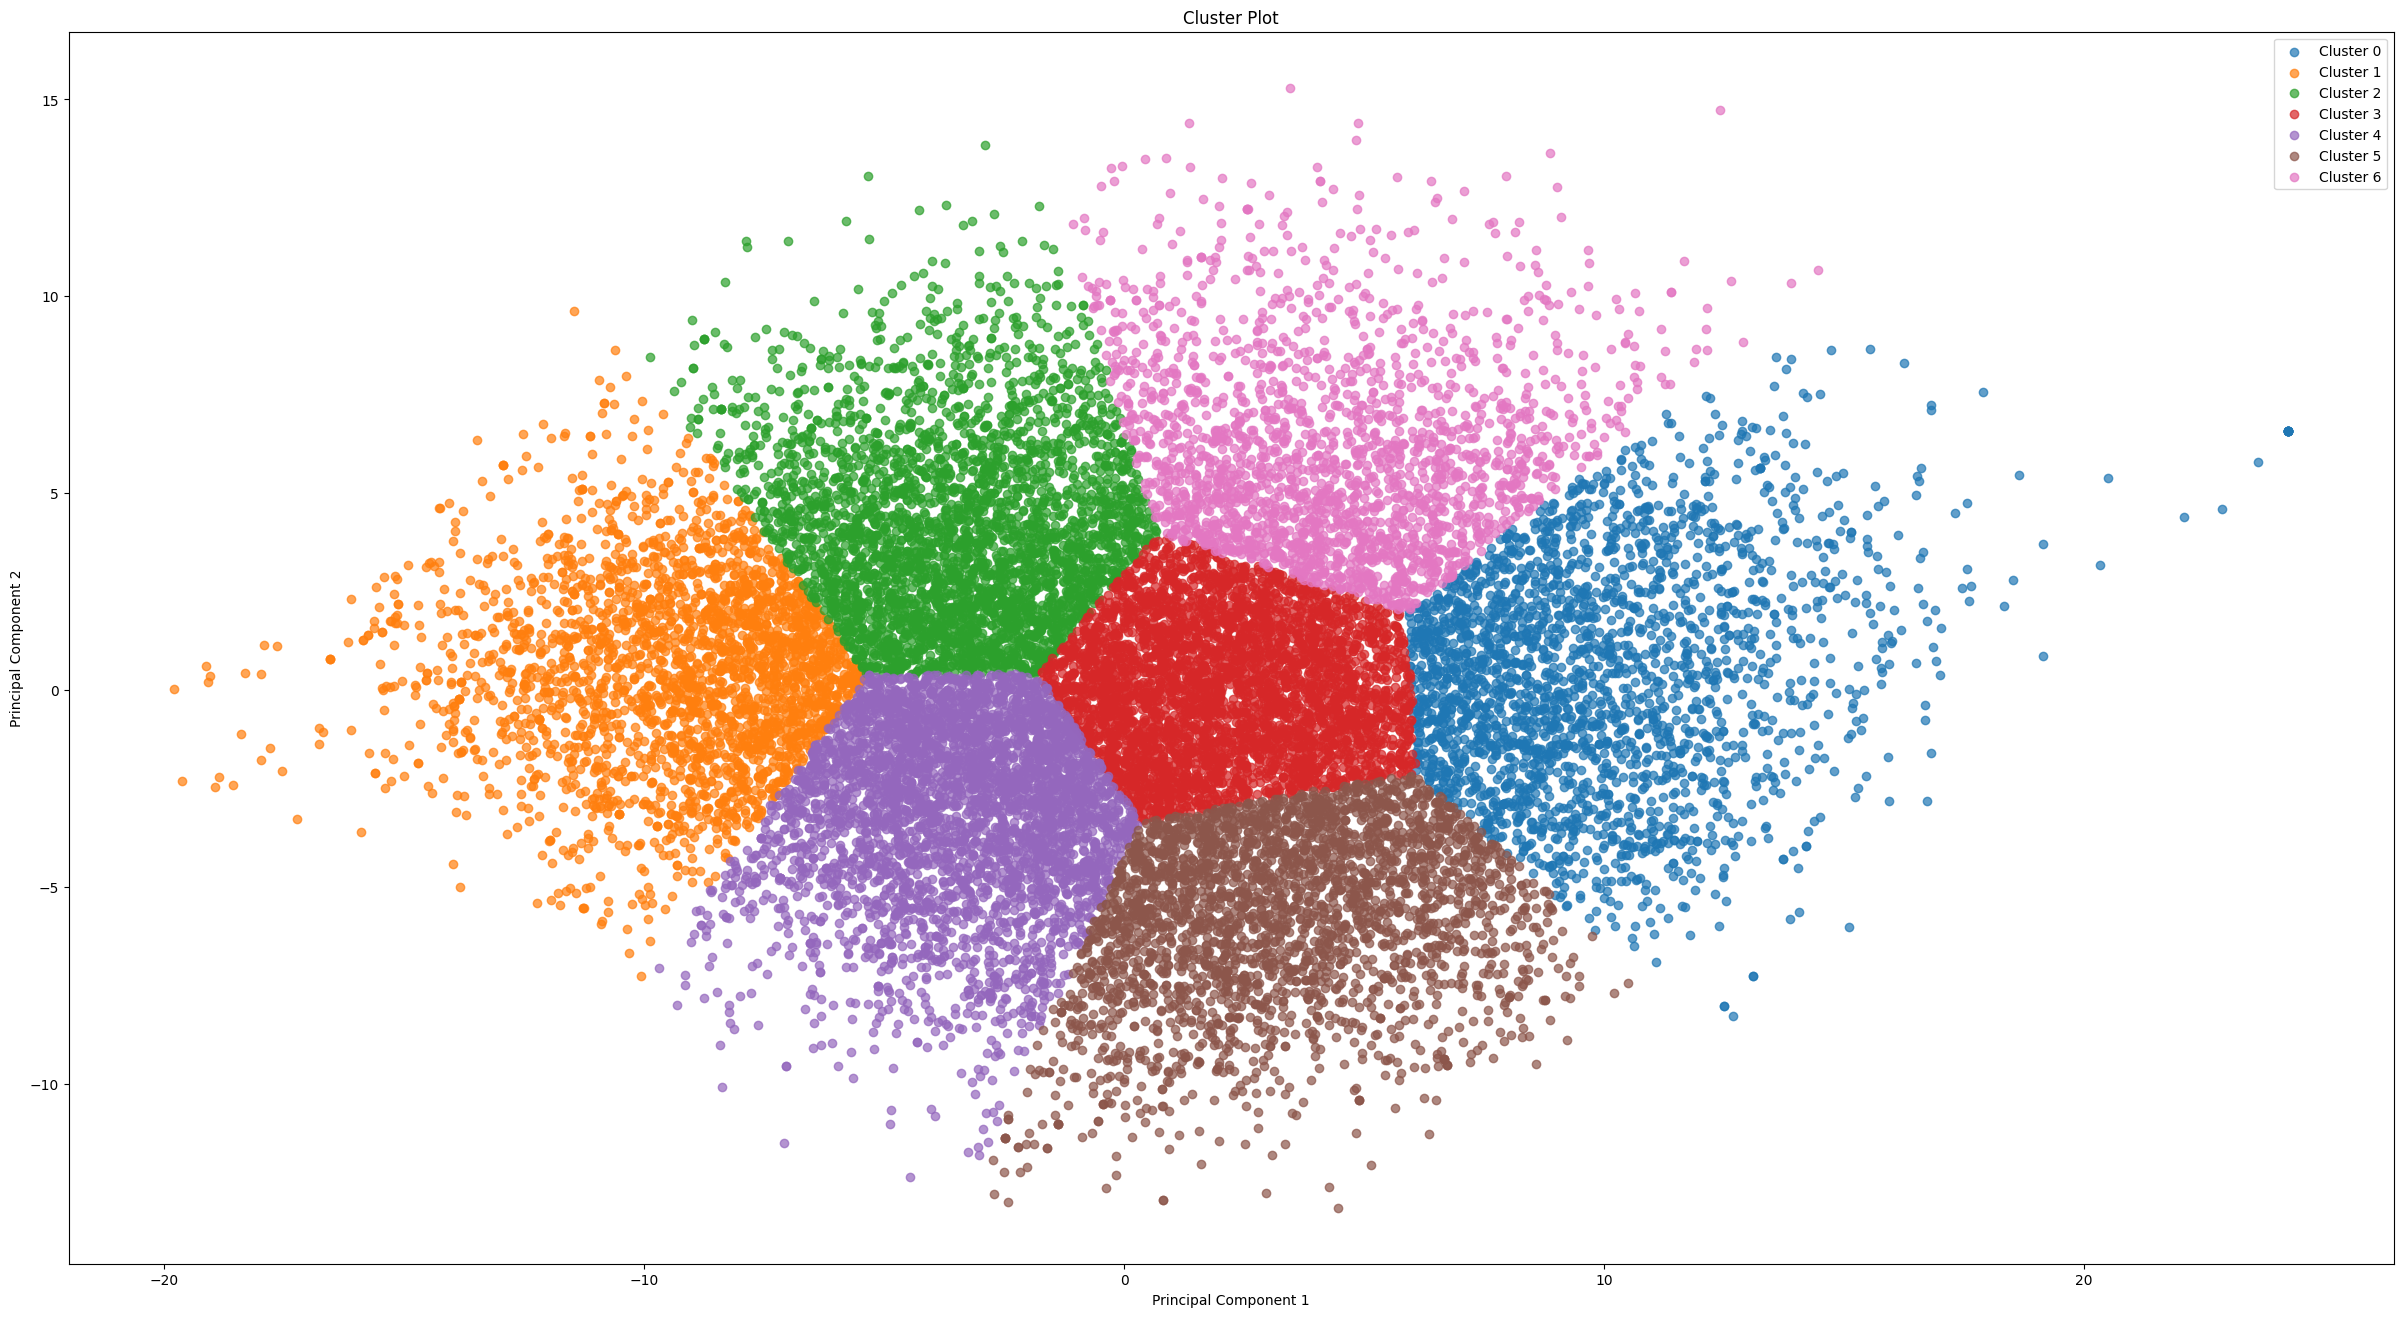

In [13]:
plt.figure(figsize=(30, 16))
for cluster_id in range(max(kmeans_pca.labels_) + 1):
    plt.scatter(
        train_pca[kmeans_pca.labels_ == cluster_id, 0],
        train_pca[kmeans_pca.labels_ == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )

plt.title('Cluster Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

###Cluster Plots with Centroids

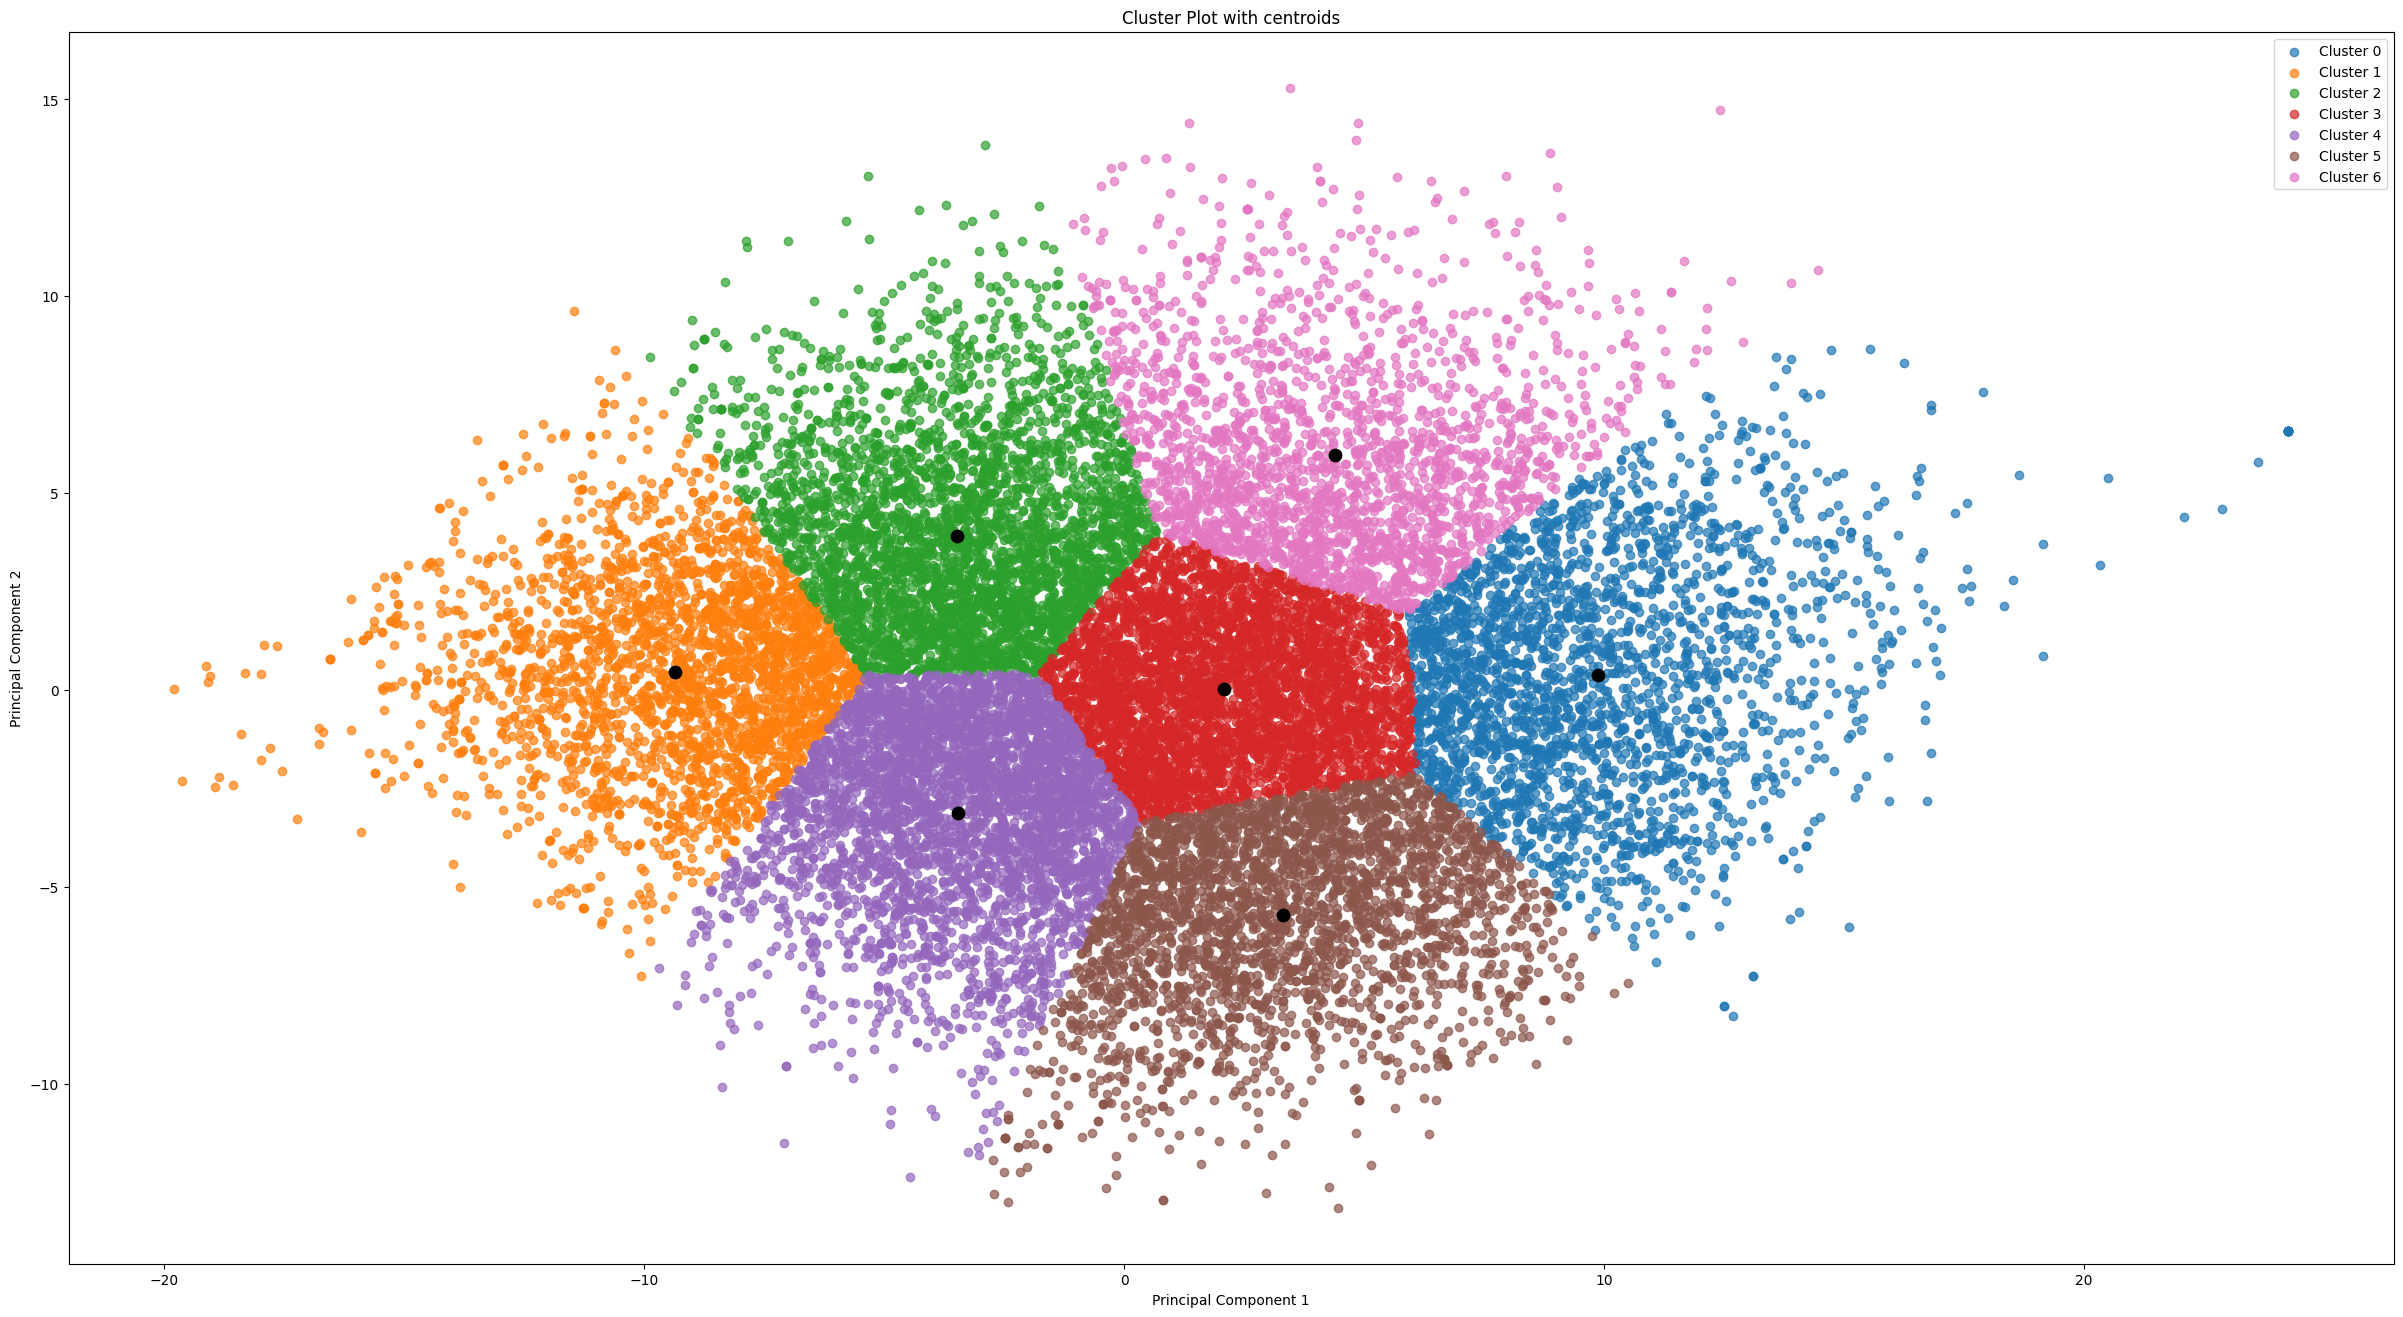

In [14]:
centroids = kmeans_pca.cluster_centers_

plt.figure(figsize=(30, 16))

for cluster_id in range(max(kmeans_pca.labels_) + 1):

    plt.scatter(
        train_pca[kmeans_pca.labels_ == cluster_id, 0],
        train_pca[kmeans_pca.labels_ == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        alpha=0.7
    )



plt.scatter(centroids[:,0], centroids[:,1], s = 80, color = 'k')
plt.title('Cluster Plot with centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

###Function for applying Cross Validation

In [15]:
''' function -> Use cross validation and check the model score '''
from sklearn.model_selection import cross_val_score, KFold
def apply_cross_validation(kmeans, X):
  k_fold = KFold(n_splits=10, shuffle=True, random_state=21)

  scores = []

  count = 1


  for train_index, test_index in k_fold.split(X):
    X_train, X_test = X[train_index], X[test_index]

    kmeans.fit(X_train)

    score = silhouette_score(X_train, kmeans.labels_)

    print("Iteration %d -> score = %.2f" % (count, score))

    scores.append(score)

    count += 1


  print("\nAverage Report: ")
  print("Silhouette avg: %.2f" % (np.mean(scores)))

###Function for getting optimal parameters

In [16]:
''' function -> Make a function for finding the right number of n_component and n_clusters arugument '''
def optimized_params(comp_range, cluster_range, data):
  param = {'n_components': 0, 'n_clusters': 0, 'score': -100, 'data_pca': None, 'training_set': None}
  model = None
  kmeans_args = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
       "random_state": 42,
  }

  training_set, testing_set = train_test_split(data, test_size=0.1, random_state = 42)
  max_score = -100

  for n_components in range(comp_range[0], comp_range[1]+1):
    for n_clusters in range(cluster_range[0], cluster_range[1]+1):
      pca = PCA(n_components=n_components)
      X_pca = pca.fit_transform(training_set)

      kmeans = KMeans(n_clusters=n_clusters,**kmeans_args)
      kmeans.fit(X_pca)

      score = silhouette_score(X_pca, kmeans.labels_)


      if score > max_score:
        max_score = score
        param['n_components'] = n_components
        param['n_clusters'] = n_clusters
        param['score'] = score
        param['data_pca'] = X_pca
        param['training_set'] = training_set
        model = kmeans

  return model, param


###Getting the optimal parameters and then applying cross validation

In [17]:
model, parameters = optimized_params([2, 5], [5, 15], normalizedValues)
apply_cross_validation(model, parameters['data_pca'])

Iteration 1 -> score = 0.33
Iteration 2 -> score = 0.33
Iteration 3 -> score = 0.33
Iteration 4 -> score = 0.33
Iteration 5 -> score = 0.33
Iteration 6 -> score = 0.33
Iteration 7 -> score = 0.33
Iteration 8 -> score = 0.33
Iteration 9 -> score = 0.33
Iteration 10 -> score = 0.33

Average Report: 
Silhouette avg: 0.33


##Plotting from each cluster

Plotting 5 random images from each cluster

[0 1 2 3 4 5 6]
   Cluster                                       Pixel Arrays
0        0  [[71.62921348314607, 70.19662921348315, 70.196...
1        1  [[219.3, 209.10000000000002, 134.2999999999999...
2        2  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3        3  [[166.96428571428572, 37.44047619047618, 38.45...
4        4  [[228.46153846153848, 252.69230769230774, 255....
5        5  [[239.82142857142858, 227.67857142857142, 222....
6        6  [[82.4353448275862, 90.12931034482759, 95.625,...


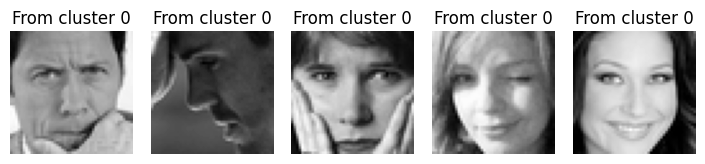

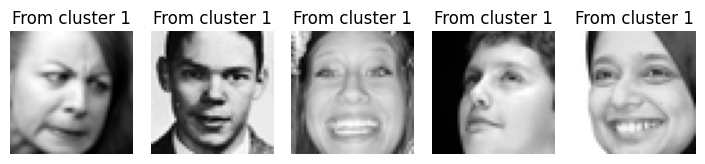

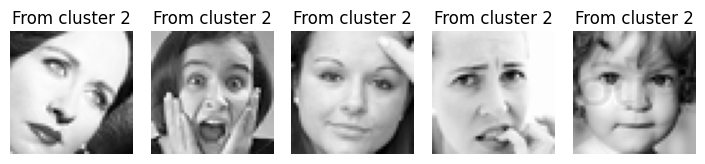

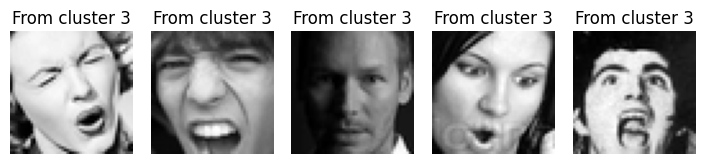

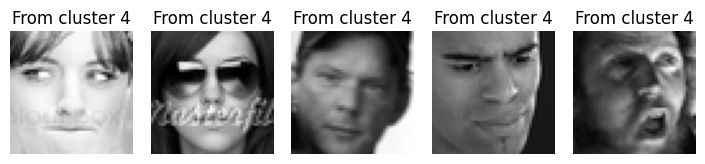

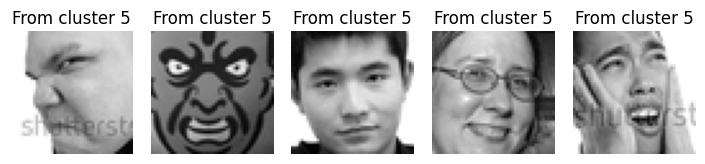

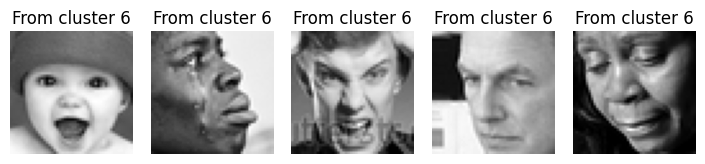

In [18]:
#plot images from each cluster to identify classes

# print(parameters['training_set'])
# print(model.labels_)

scaler_reverse = scaler.inverse_transform(parameters['training_set'])
#print(scaler_reverse)

pixel_values = scaler_reverse

cluster = model.labels_

print(np.unique(cluster))

list_of_tuples = list(zip(pixel_values, cluster))

plotting_df = pd.DataFrame(list_of_tuples, columns = ['Pixel Values', 'Cluster'])

#print(plotting_df)

grouped_df = plotting_df.groupby('Cluster')['Pixel Values'].apply(list).reset_index(name='Pixel Arrays')

print(grouped_df)


# Function to plot images
def plot_images(images, whichCluster):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(7, 7, i + 1)
        plt.imshow(np.array(img).reshape(48,48), cmap='gray')
        plt.axis('off')
        plt.title("From cluster " + str(whichCluster))
    plt.tight_layout()
    plt.show()

# Plot 10 random images from each cluster
for _, row in grouped_df.iterrows():
    cluster_images = row['Pixel Arrays']
    random_indices = np.random.choice(len(cluster_images), size=min(5, len(cluster_images)), replace=False)
    random_images = [cluster_images[i] for i in random_indices]
    plot_images(random_images, row['Cluster'])

Plotting 30 images that are closest to each cluster's centroid (to see if we can classify them better)

Smallest distances found at indices: [161, 84, 384, 636, 887, 689, 1253, 1280, 1950, 1199, 1136, 681, 1264, 1875, 861, 548, 518, 371, 2094, 1007, 938, 1751, 1092, 334, 2027, 2090, 770, 1301, 1130, 670]


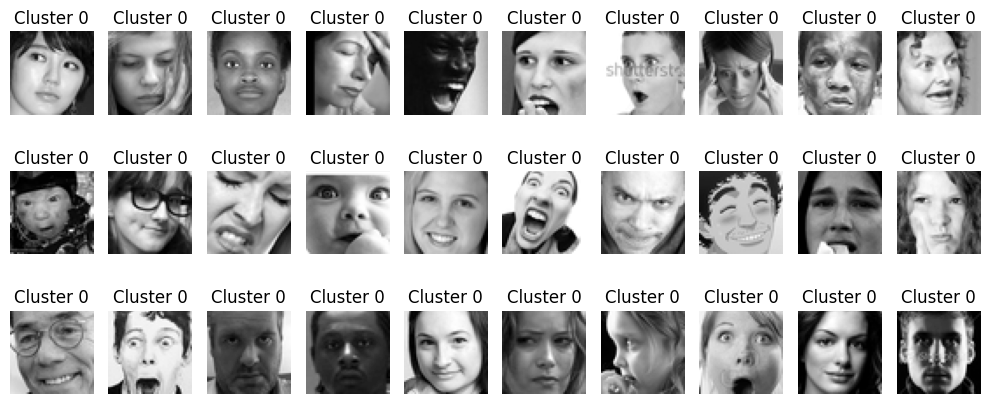

Smallest distances found at indices: [818, 2320, 639, 1845, 864, 2126, 936, 2046, 461, 1309, 490, 771, 1366, 1492, 1704, 972, 1846, 2398, 2248, 1861, 1205, 2262, 1958, 992, 1771, 1299, 2340, 2271, 1159, 1068]


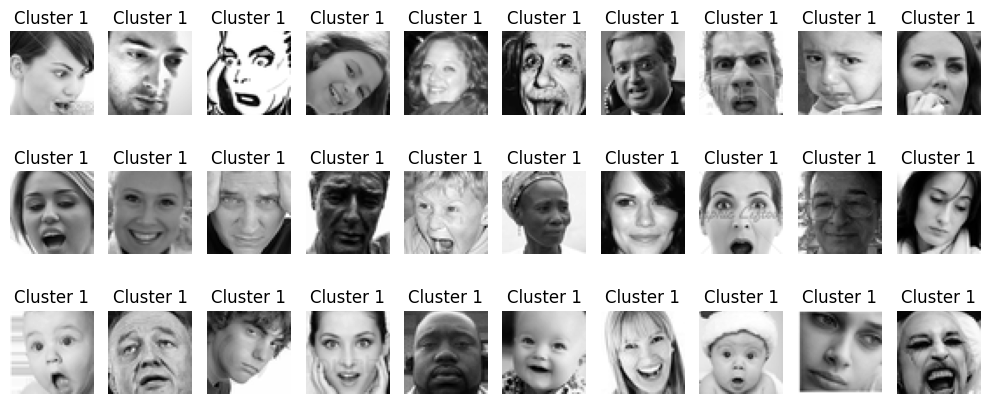

Smallest distances found at indices: [117, 1477, 525, 727, 392, 2118, 540, 996, 2409, 980, 501, 2216, 1529, 253, 1254, 1616, 2627, 2058, 1889, 1055, 846, 2140, 657, 1495, 2494, 262, 335, 621, 444, 287]


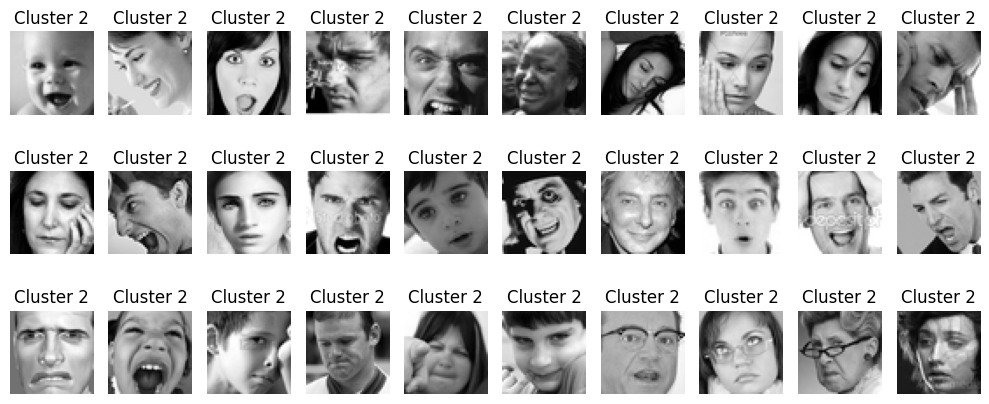

Smallest distances found at indices: [830, 572, 2086, 897, 1336, 3081, 1077, 1643, 2029, 2801, 578, 2914, 1641, 394, 2707, 2336, 2783, 2072, 1702, 1171, 774, 2429, 1239, 1037, 40, 1091, 1981, 1840, 483, 2206]


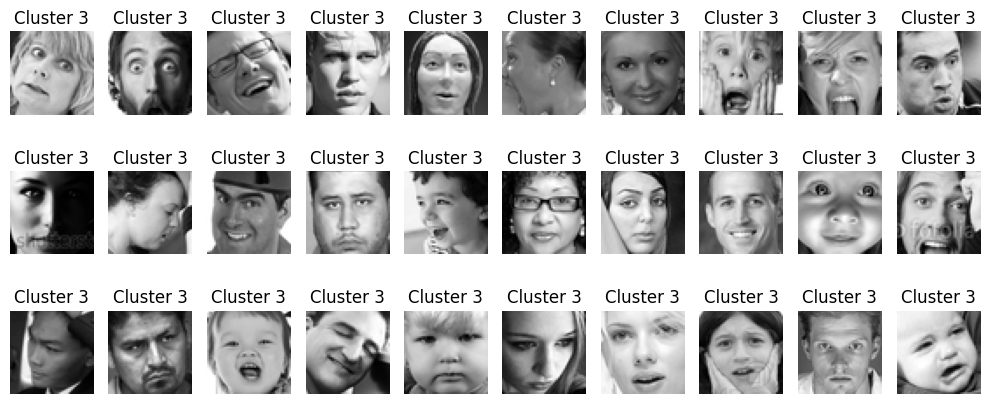

Smallest distances found at indices: [898, 1743, 1385, 692, 1518, 420, 370, 1705, 1452, 1348, 804, 1568, 1525, 1090, 533, 306, 870, 740, 947, 1319, 1640, 696, 285, 582, 534, 866, 905, 1165, 159, 1516]


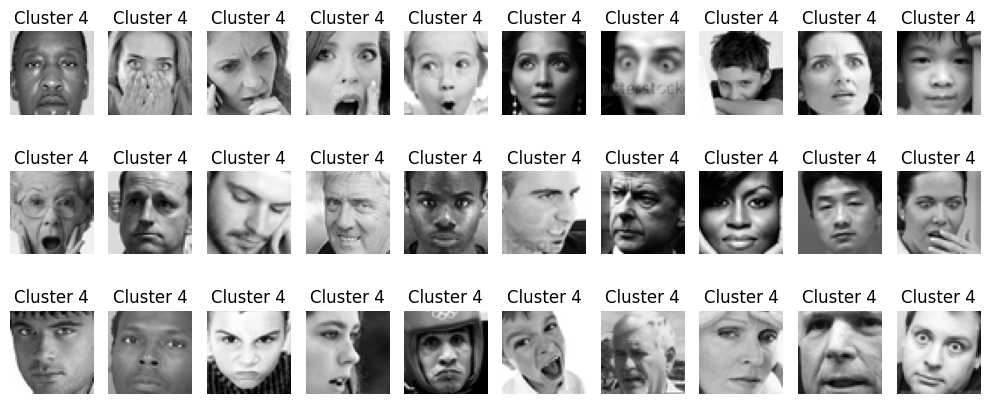

Smallest distances found at indices: [332, 2536, 2697, 1752, 1666, 2459, 2199, 2705, 50, 2437, 2244, 1248, 3022, 1774, 2540, 1670, 2074, 2189, 3330, 2771, 3204, 650, 422, 890, 1677, 2259, 549, 2563, 1416, 928]


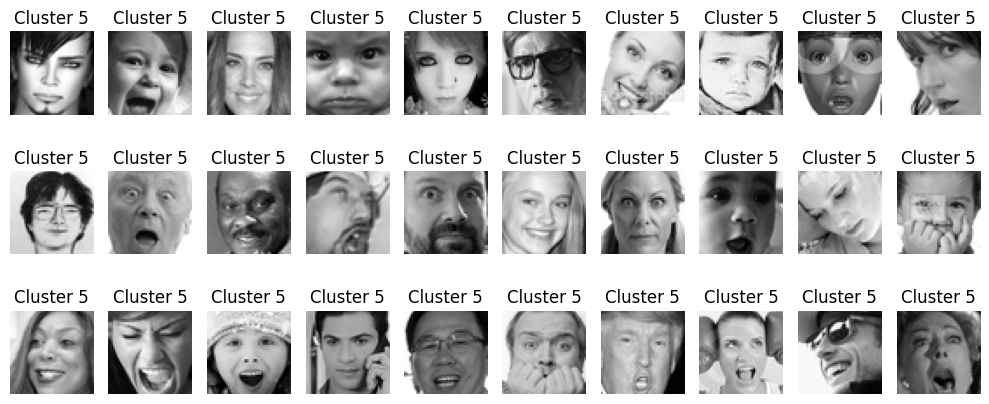

Smallest distances found at indices: [1028, 186, 1238, 388, 1255, 3475, 2876, 680, 2136, 3156, 828, 1027, 2350, 3139, 1629, 1467, 1857, 2443, 3120, 1506, 1317, 2902, 396, 1103, 2932, 1729, 2898, 1571, 674, 901]


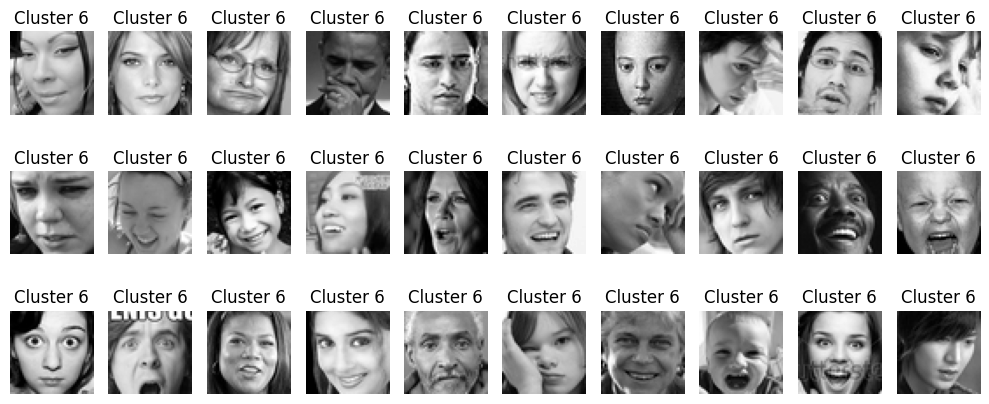

In [23]:

from pickleshare import print_function
from sklearn.metrics import pairwise_distances_argmin
import math



# Function to plot images
def plot_images(images, whichCluster):
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(images):
        plt.subplot(7, 10, i + 1)
        plt.imshow(np.array(img).reshape(48,48), cmap='gray')
        plt.axis('off')
        plt.title("Cluster " + str(whichCluster))
    plt.tight_layout()
    plt.show()

#Returns an array

def findClosestToCentroid(centroidForRow, pixelArrayForRow):

  distanceandIndexArray = []
  indexArrayToReturn = []

  #Getting the distance and the index as a tuple
  for i in range(len(pixelArrayForRow)):
    distanceandIndexArray.append((math.dist(centroidForRow,train_pca[i]),i))

  #Now we can access the first 5 elements and just get their indices from the second member of their tuple
  distanceandIndexArray.sort()


  #Adjust x to how many images from each cluster you want
  x = 30
  for i in range(x):
    indexArrayToReturn.append(distanceandIndexArray[i][1])


  print("Smallest distances found at indices:", indexArrayToReturn)

  return indexArrayToReturn


#Important
centroids = kmeans_pca.cluster_centers_

# Plot images that are closest to each cluster centroid
for _, row in grouped_df.iterrows():
    cluster_images = row['Pixel Arrays']
    indices = findClosestToCentroid(centroids[row['Cluster']], row['Pixel Arrays'])
    images = [cluster_images[i] for i in indices]
    plot_images(images, row['Cluster'])

###Error Analysis

In [21]:
# Function to compare the first 3 decimal places
def compare_first_dec_decimal_places(a, b, dec):
    return round(a, dec) == round(b, dec)


df = pd.read_csv("face-emo.csv")

data_ = pd.concat([df["emotion"], pixelnormdf], axis=1)
# print(data_)
no_match = 0
df_data = []


# create a dataframe [OG_Emotion, Culter_Emotion, img_data]
for item in list_of_tuples:
    # Extract the img, emotion
    img = item[0]
    emotion = item[1]

    # Normalize
    scaler = MinMaxScaler()
    normalized_img = scaler.fit_transform(img.reshape(-1, 1)).reshape(-1)

    # Find its match in the og data set
    matching_list = []
    matched_emotion = None  # Initialize matched_emotion to None
    for i, (sublist, em) in enumerate(zip(data_.pixels, data_.emotion)):
        if all(compare_first_dec_decimal_places(a, b, 4) for a, b in zip(normalized_img, sublist)):
            matching_list = sublist
            matched_emotion = em
            break

    # Print the matching list if found
    if len(matching_list) > 0:
        df_data.append({'OG_Emotion': matched_emotion, 'Cluster_Emotion': emotion, 'img_data': normalized_img})
        # plot_images([matching_list, normalized_img])
    else:
        no_match += 1
        # print("No matching list found.")

result_df = pd.DataFrame(df_data)

#Will be a flag later
converted = 0

# print("no_match", no_match)
# print(result_df)

# THIS WILL TAKE A FEW MIN TO RUN

In [22]:
# # OG Labels
# 0 - Angry
# 1 - Disgust
# 2 - Fear
# 3 - Happy
# 4 - Sad
# 5 - Suprized
# 6 - Neutral

# # Cluster labels
# 0 -
# 1 -
# 2 -
# 3 -
# 4 -
# 5 -
# 6 -

from sklearn.metrics import accuracy_score

# Attempt at remapping emotions to
emotion_mapping = {
    0: 1,
    1: 3,
    2: 6,
    3: 5,
    4: 0,
    5: 2,
    6: 4
}

#We can do this so we can run this code block multiple times. Self modifying code
#will change accuracies further

testingdf = result_df

#If we run this code block again for testing purposes, won't further convert mapped emotions
if converted == 0:
  testingdf['Cluster_Emotion'] = testingdf['Cluster_Emotion'].map(emotion_mapping)
  converted = 1
else:
  pass

# Calculate classification accuracy between OG_Emotion and Culter_Emotion
accuracy = accuracy_score(testingdf['OG_Emotion'], testingdf['Cluster_Emotion'])

print("Classification Accuracy:", accuracy*100)

Classification Accuracy: 14.84351261014889
